# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [157]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [158]:
city_name = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_cloud = []
city_wind = []
city_country = []
city_date = []

In [159]:
print("Beginning Data Retrieval")
print("-----------------------------")

index = 0
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


for x in cities: 
    try:
        response = requests.get(query_url + x).json()
        
        city_name.append(response["name"])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_cloud.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])
        
        if index > 49:
            index = 0
            set_count += 1
        else:
            index += 1
            
        print(f"Processing Record {index} of Set {set_count} | {x}")
           
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 5 of Set 1 | deniliquin
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | kedrovyy
Processing Record 12 of Set 1 | aksu
Processing Record 13 of Set 1 | camaqua
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | bataipora
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | wewak
Processing Record 19 of Set 1 | sola
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | maniitsoq
City not found. Skipping...
City not 

Processing Record 35 of Set 4 | xai-xai
Processing Record 36 of Set 4 | dossor
Processing Record 37 of Set 4 | kandra
Processing Record 38 of Set 4 | sorgun
Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | kahului
City not found. Skipping...
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | bathsheba
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | leshukonskoye
Processing Record 46 of Set 4 | urcos
Processing Record 47 of Set 4 | port augusta
Processing Record 48 of Set 4 | jiaocheng
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | marsabit
Processing Record 0 of Set 5 | esperance
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | pointe-noire
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | okhotsk
Processing Record 5 of Set 5 | maragogi
Processing Record 6 of Set 5 | nichinan
Processing Record 7 of Set 5

Processing Record 21 of Set 8 | carnarvon
Processing Record 22 of Set 8 | sisimiut
Processing Record 23 of Set 8 | haapiti
Processing Record 24 of Set 8 | todiresti
Processing Record 25 of Set 8 | ballina
City not found. Skipping...
Processing Record 26 of Set 8 | toro
Processing Record 27 of Set 8 | bethal
Processing Record 28 of Set 8 | znamenskoye
Processing Record 29 of Set 8 | kiama
Processing Record 30 of Set 8 | north vanlaiphai
Processing Record 31 of Set 8 | stornoway
Processing Record 32 of Set 8 | upata
Processing Record 33 of Set 8 | mount darwin
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | kurkino
Processing Record 36 of Set 8 | batemans bay
Processing Record 37 of Set 8 | huangpi
Processing Record 38 of Set 8 | palora
Processing Record 39 of Set 8 | vozhega
Processing Record 40 of Set 8 | kargopol
Processing Record 41 of Set 8 | nadym
Processing Record 42 of Set 8 | solnechnyy
Processing Record 43 of Set 8 | tura
Processing Record 44 of Set 8 |

Processing Record 5 of Set 12 | guilin
Processing Record 6 of Set 12 | mount isa
Processing Record 7 of Set 12 | otavi
Processing Record 8 of Set 12 | bulungu
Processing Record 9 of Set 12 | tapes
Processing Record 10 of Set 12 | santander
Processing Record 11 of Set 12 | ust-ordynskiy
Processing Record 12 of Set 12 | asasa
Processing Record 13 of Set 12 | salekhard
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [160]:
data_df = pd.DataFrame({
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_cloud,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,8.95,72,84,10.91,BR,1626688067
1,Bluff,-46.6000,168.3333,6.56,89,62,4.66,NZ,1626688067
2,Busselton,-33.6500,115.3333,13.91,69,100,3.42,AU,1626688067
3,Punta Arenas,-53.1500,-70.9167,5.06,75,0,9.77,CL,1626688068
4,Deniliquin,-35.5333,144.9667,8.89,75,96,3.21,AU,1626688068
...,...,...,...,...,...,...,...,...,...
569,Tapes,-30.6733,-51.3958,9.01,70,94,8.36,BR,1626688297
570,Santander,43.4647,-3.8044,27.62,78,0,0.89,ES,1626688297
571,Ust'-Ordynskiy,52.8050,104.7508,17.91,61,100,0.80,RU,1626688298
572,Āsasa,7.1000,39.2000,19.01,66,67,3.20,ET,1626688298


In [161]:
# Looking at the max row for the humidity column to see if there are any above 100.
data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.786693,17.606063,21.772596,68.348432,54.423345,3.443659,1.626688e+09
std,33.440301,87.783664,8.516589,22.864206,38.774691,2.509539,8.452686e+01
min,-54.800000,-175.200000,-3.060000,6.000000,0.000000,0.000000,1.626688e+09
25%,-7.787075,-59.257225,16.292500,54.000000,14.250000,1.702500,1.626688e+09
50%,25.700000,23.131250,23.055000,75.000000,62.000000,2.815000,1.626688e+09
75%,49.563125,91.795500,27.420000,86.000000,94.000000,4.687500,1.626688e+09
max,78.218600,179.316700,47.980000,100.000000,100.000000,13.470000,1.626688e+09


In [162]:
# Writing our dataframe to a CSV

data_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [163]:
#  Get the indices of cities that have humidity over 100%.


In [164]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

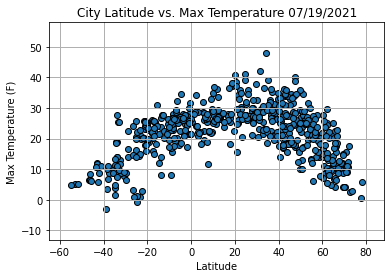

In [165]:
x_values = data_df["Lat"]
y_values = data_df["Max Temp"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Max Temperature 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

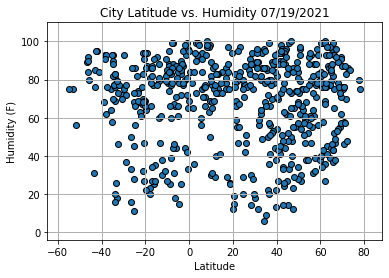

In [166]:
x_values = data_df["Lat"]
y_values = data_df["Humidity"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Humidity 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Humidity (F)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

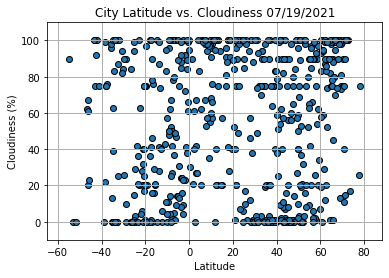

In [167]:
x_values = data_df["Lat"]
y_values = data_df["Cloudiness"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Cloudiness 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 10, max(y_values) + 10)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

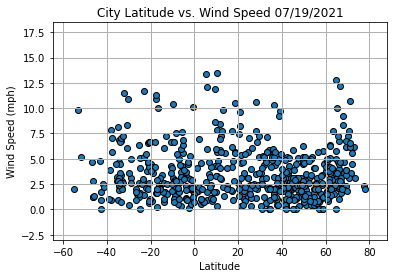

In [168]:
x_values = data_df["Lat"]
y_values = data_df["Wind Speed"]

plt.scatter(x_values,y_values, edgecolor = 'black')
plt.title("City Latitude vs. Wind Speed 07/19/2021")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(linestyle = '-', linewidth = 1)

plt.xlim(min(x_values) - 10, max(x_values) + 10)
plt.ylim(min(y_values) - 3, max(y_values) + 5)

xticks = np.arange(-60, 85, 20)
plt.xticks(xticks)

#plt.show()
plt.savefig("../output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [169]:
def do_linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y, edgecolor = 'black')
    plt.plot(x,regress_values,"r-")
    
    correlation = st.pearsonr(x, y)
    print(f"The Pearson correlation is: {round(correlation[0],2)}")
    print(f"The line equation is: {line_eq}")
    return 

In [170]:
# Northern Hemisphere is where Lat >= 0
north_hemi = data_df.loc[(data_df["Lat"] >= 0), :]

# Southern Hemisphere is where Lat < 0
south_hemi = data_df.loc[(data_df["Lat"] < 0), :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation is: -0.58
The line equation is: y = -0.24x + 33.18


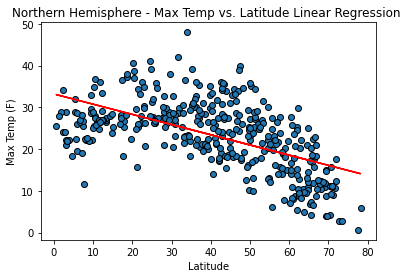

In [171]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Max Temp"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
# plt.annotate(line_eq,(0,0),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Pearson correlation is: 0.73
The line equation is: y = 0.44x + 27.41


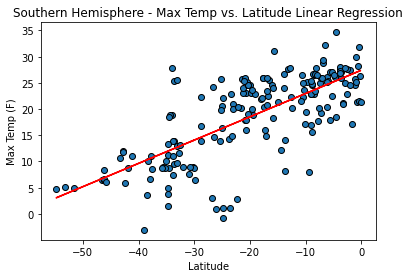

In [172]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Max Temp"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
# plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.05
The line equation is: y = -0.06x + 70.29


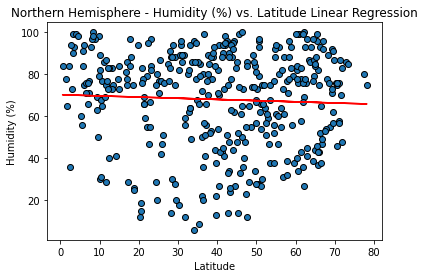

In [173]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Humidity"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.annotate(line_eq,(50,10),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.02
The line equation is: y = -0.03x + 68.44


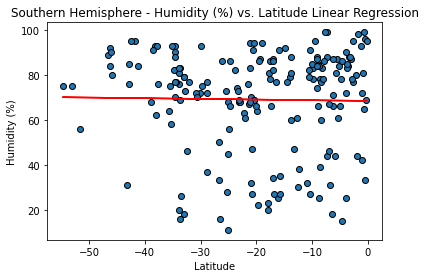

In [174]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Humidity"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation is: 0.0
The line equation is: y = 0.0x + 57.19


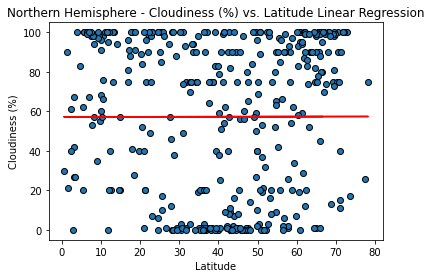

In [175]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Cloudiness"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Pearson correlation is: -0.0
The line equation is: y = -0.0x + 48.53


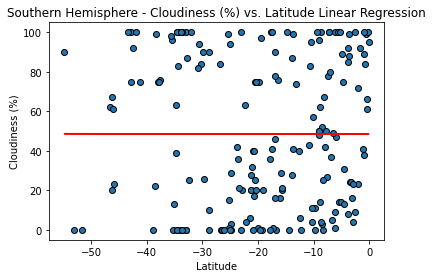

In [176]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Cloudiness"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation is: -0.06
The line equation is: y = -0.01x + 3.72


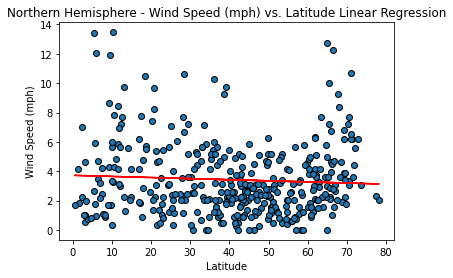

In [177]:
x_values = north_hemi["Lat"]
y_values = north_hemi["Wind Speed"]

do_linear_regression(x_values, y_values)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Pearson correlation is: -0.11
The line equation is: y = -0.02x + 3.09


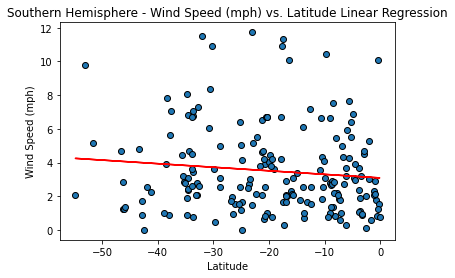

In [178]:
x_values = south_hemi["Lat"]
y_values = south_hemi["Wind Speed"]

do_linear_regression(x_values, y_values)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
#plt.show()
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")